### 주가 지수로부터 금값 예측하기

#### 1) 단순선형회귀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # 다항 항 추가를 위해 필요
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # 자동 성능 평가를 위해 필요

# 데이터 로딩
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [ ]:
x = train[["stock price index"]] # 주가지수
y = train["gold price"] # 금값

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

R2 = r2_score(y_test, y_pred)
print(R2)


In [ ]:

# 📊 단순 선형 회귀 시각화
plt.figure(figsize=(10, 6))

# 1. 학습 데이터 점 찍기
plt.scatter(x_train, y_train, color='blue', label='Train Data', alpha=0.6)

# 2. 시험 데이터 점 찍기
plt.scatter(x_test, y_test, color='green', label='Test Data', alpha=0.6)

# 3. 예측 선 (직선) 그리기
# 구간용 x값 생성 → 전체 구간 커버
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = lr.predict(x_range)

plt.plot(x_range, y_line, color='red', label='Prediction Line (Simple LR)')

# 레이블, 제목, 격자, 범례 추가
plt.xlabel("Stock Price Index")
plt.ylabel("Gold Price")
plt.grid(True)
plt.legend()
plt.show()

### 2. 다항회귀

In [65]:
# 항 추가 --> x²
poly = PolynomialFeatures(degree=5, include_bias=True)
x_train_poly = poly.fit_transform(x_train) # 학습 데이터(x_train)를 다항 특성으로 변환
x_test_poly = poly.fit_transform(x_test) # 시험 데이터(x_test)도 같은 방식으로 변환

# 다항 회귀 모델 학습
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train) # 학습
y_pred_poly = lr_poly.predict(x_test_poly) # 예측
R2_poly = r2_score(y_test, y_pred_poly) # 평가

In [66]:
print("다항 회귀 점수:", R2_poly)

# 학습용 점수 출력
print("학습용 데이터 세트 점수:", lr_poly.score(x_train_poly, y_train))

# 시험용 점수 출력
print("시험용 데이터 세트 점수:", lr_poly.score(x_test_poly, y_test))

다항 회귀 점수: 0.7705667009940287
학습용 데이터 세트 점수: 0.7092585793381749
시험용 데이터 세트 점수: 0.7705667009940287


/Users/manggee/Code/dongduk/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


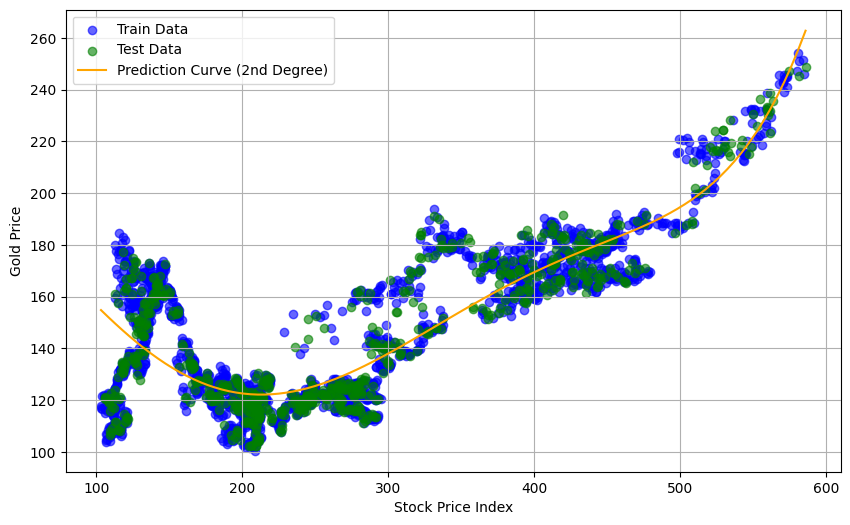

In [62]:
# 📊 다항 회귀 결과 시각화
plt.figure(figsize=(10, 6))

# 1. 학습 데이터 점 (파란색)
plt.scatter(x_train, y_train, color='blue', label='Train Data', alpha=0.6)

# 2. 시험 데이터 점 (초록색)
plt.scatter(x_test, y_test, color='green', label='Test Data', alpha=0.6)

# 3. 예측선을 그리기 위한 x 범위 생성
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# 4. x_range도 다항 특성으로 변환 (상수항 포함)
x_range_poly = poly.transform(x_range)

# 5. 예측값 계산
y_range_pred = lr_poly.predict(x_range_poly)

# 6. 예측 곡선 (주황색) 그리기
plt.plot(x_range, y_range_pred, color='orange', label='Prediction Curve (2nd Degree)')

# 그래프 레이블, 제목 등 꾸미기
plt.xlabel("Stock Price Index")
plt.ylabel("Gold Price")
plt.grid(True)
plt.legend()
plt.show()

In [68]:
# 📌 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 📌 데이터 불러오기
train = pd.read_csv("train.csv")

# 입력값 x, 정답값 y 분리
x = train[["stock price index"]]  # 입력은 DataFrame 형태 유지
y = train["gold price"]

# 📌 학습용과 시험용 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# 📌 5차 다항 특성 생성기 (상수항 포함: include_bias=True)
poly = PolynomialFeatures(degree=5, include_bias=True)

# x 데이터 다항 변환
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# 📌 스케일링 (표준화: 평균 0, 표준편차 1)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_poly)
x_test_scaled = scaler.transform(x_test_poly)

# 📌 선형 회귀 모델 학습
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# 📌 예측 수행
y_pred = lr.predict(x_test_scaled)

# 📌 성능 평가 (결정계수 R²)
r2 = r2_score(y_test, y_pred)
print("5차 다항 회귀 + 스케일링 R^2 점수:", r2)



5차 다항 회귀 + 스케일링 R^2 점수: 0.7882467052456092


/Users/manggee/Code/dongduk/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/manggee/Code/dongduk/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/manggee/Code/dongduk/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/manggee/Code/dongduk/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/manggee/Code/dongduk/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) m

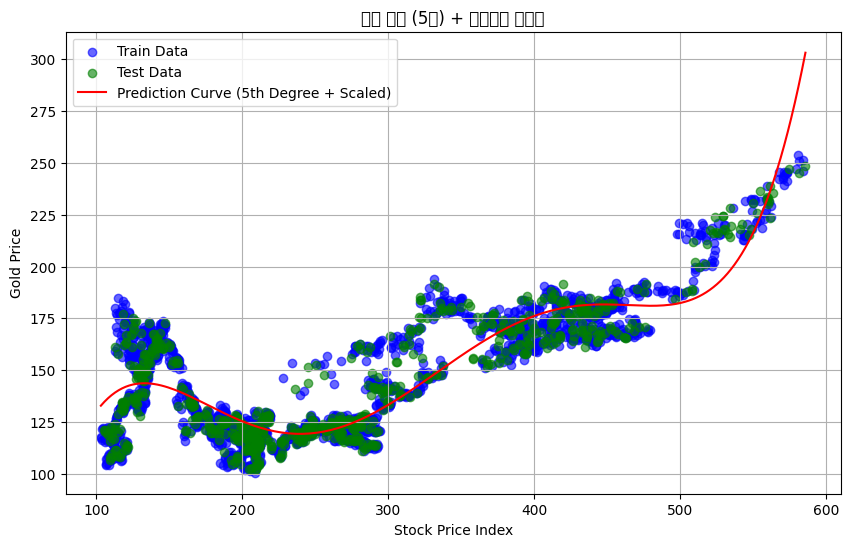

In [70]:
# 📊 시각화
plt.figure(figsize=(10, 6))

# 학습 데이터 점
plt.scatter(x_train, y_train, color='blue', label='Train Data', alpha=0.6)

# 시험 데이터 점
plt.scatter(x_test, y_test, color='green', label='Test Data', alpha=0.6)

# 예측선 그리기용 x 범위 생성
x_range = np.linspace(x["stock price index"].min(), x["stock price index"].max(), 200).reshape(-1, 1)

# 다항 변환 + 스케일링
x_range_poly = poly.transform(x_range)
x_range_scaled = scaler.transform(x_range_poly)

# 예측선 계산
y_range_pred = lr.predict(x_range_scaled)

# 예측 곡선 그리기
plt.plot(x_range, y_range_pred, color='red', label='Prediction Curve (5th Degree + Scaled)')

# 그래프 꾸미기
plt.xlabel("Stock Price Index")
plt.ylabel("Gold Price")
plt.title("다항 회귀 (5차) + 스케일링 시각화")
plt.grid(True)
plt.legend()
plt.show()

In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 📌 데이터 불러오기
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

# 📌 x, y 나누기
x = train[["stock price index"]]
y = train["gold price"]

# 📌 5차 다항 특성 + 스케일링
poly = PolynomialFeatures(degree=5, include_bias=True)
x_poly = poly.fit_transform(x)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_poly)

# 📌 모델 학습
lr = LinearRegression()
lr.fit(x_scaled, y)

# 📌 test 데이터 변환 및 예측
x_test_poly = poly.transform(test)
x_test_scaled = scaler.transform(x_test_poly)
y_pred = lr.predict(x_test_scaled)

# 📌 submission 수정 및 저장
submission.dropna(axis=1, inplace=True)
submission["gold price"] = y_pred
submission.to_csv("new_submission.csv", index=False)

print("✅ new_submission.csv 저장 완료")

✅ new_submission.csv 저장 완료


In [72]:
df = pd.read_csv("submission.csv")
df.dropna(axis=1, inplace=True)

df["gold price"] = y_test_pred